In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data)
print(data)

          0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

In [4]:
data.columns = boston.feature_names
data.head()
data['PRICE'] = boston.target 
data['PRICE']


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [5]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
# X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']
X = data['LSTAT'].values
X=X.reshape(-1,1)

In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [9]:
y_train.shape

(354,)

In [10]:
#converting the independent variables  with degree of polynomial 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

X_train_t = poly_reg.fit_transform(X_train)
X_test_t = poly_reg.fit_transform(X_test)

In [11]:
X_test_t.shape

(152, 3)

In [12]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_t,y_train)

LinearRegression()

In [13]:
y_pred = lin_reg.predict(X_test_t)

In [14]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_linreg)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.6666081649037843
RMSE: 5.900237242596899


In [15]:
coeff = np.polyfit(X_test[:,0], y_pred,2)
coeff

array([ 3.71837175e-02, -2.10450914e+00,  4.10685101e+01])

In [16]:
p = np.poly1d(coeff)
p

poly1d([ 3.71837175e-02, -2.10450914e+00,  4.10685101e+01])

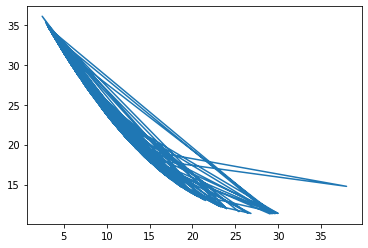

In [17]:
plt.plot(X_test, p(X_test), '-')

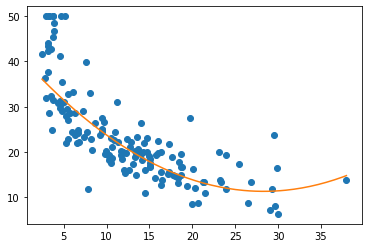

In [18]:
X_coord = np.linspace(np.min(X_test), np.max(X_test), len(X_test))
plt.plot(X_test, y_test,'o')
plt.plot(X_coord, p(X_coord)) # 'smoother' line
plt.show()

In [19]:
#plot for degree=20
coeff = np.polyfit(X_test[:,0], y_pred, 20)
coeff

/Users/anaghasethuraman/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3427: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([-9.76498965e-37,  4.00367428e-34, -4.77754743e-32,  2.09751022e-30,
        1.01150478e-29, -3.60229209e-27,  4.19217341e-26,  5.25948110e-24,
       -1.76804908e-22, -3.94419446e-21,  4.38738898e-19, -1.55069474e-17,
        3.30508891e-16, -4.78488313e-15,  4.88997791e-14, -3.55527439e-13,
        1.81773145e-12, -6.33826181e-12,  3.71837175e-02, -2.10450914e+00,
        4.10685101e+01])

In [23]:
p = np.poly1d(coeff)
p

poly1d([-9.76498965e-37,  4.00367428e-34, -4.77754743e-32,  2.09751022e-30,
        1.01150478e-29, -3.60229209e-27,  4.19217341e-26,  5.25948110e-24,
       -1.76804908e-22, -3.94419446e-21,  4.38738898e-19, -1.55069474e-17,
        3.30508891e-16, -4.78488313e-15,  4.88997791e-14, -3.55527439e-13,
        1.81773145e-12, -6.33826181e-12,  3.71837175e-02, -2.10450914e+00,
        4.10685101e+01])

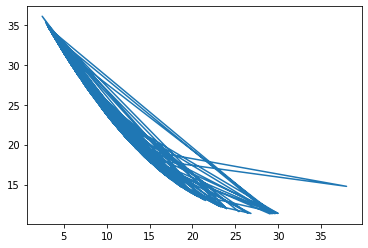

In [24]:
plt.plot(X_test, p(X_test), '-')

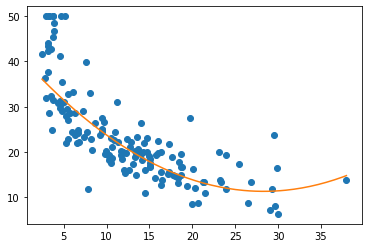

In [25]:
X_coord = np.linspace(np.min(X_test), np.max(X_test), len(X_test))
plt.plot(X_test, y_test,'o')
plt.plot(X_coord, p(X_coord)) # 'smoother' line
plt.show()